# Sales Analysis

Lets import the libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

Lets merge the 12 months of sales data into one csv file.

In [3]:
path = r'/Users/shyampatel/Desktop/Projects/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up the data

In [5]:
drop_df = df[df.isna().any(axis=1)]
drop_df.head()

df = df.dropna(how='all')

### Question 1: What was the best month for sales? How much was earned that month?

In [6]:
df = df[df['Order Date'].str[:2] != 'Or']
df['month'] = df['Order Date'].str[:2]

In [7]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

In [8]:
df['subtotal'] = df['Quantity Ordered'] * df['Price Each']

In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,subtotal
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [10]:
monthly_sales = df.groupby('month').sum()

In [11]:
print(monthly_sales)

       Quantity Ordered    Price Each      subtotal
month                                              
01                10903  1.811768e+06  1.822257e+06
02                13449  2.188885e+06  2.202022e+06
03                17005  2.791208e+06  2.807100e+06
04                20558  3.367671e+06  3.390670e+06
05                18667  3.135125e+06  3.152607e+06
06                15253  2.562026e+06  2.577802e+06
07                16072  2.632540e+06  2.647776e+06
08                13448  2.230345e+06  2.244468e+06
09                13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


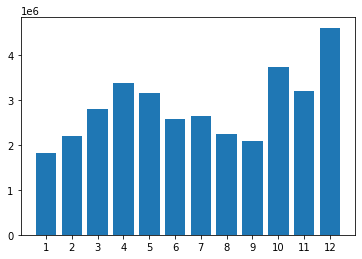

In [12]:
months = range(1,13)
plt.bar(months, monthly_sales['subtotal'])
plt.xticks(months)
plt.show()

### Question 2: What city had the highest number of sales.

In [13]:
df['city'] = df['Purchase Address'].str.split(',').str[1]
states = df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]

In [14]:
cities = df.groupby('city').subtotal.sum()
cities.sort_values(ascending = False)

city
 San Francisco    8.262204e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Boston           3.661642e+06
 Atlanta          2.795499e+06
 Dallas           2.767975e+06
 Seattle          2.747755e+06
 Portland         2.320491e+06
 Austin           1.819582e+06
Name: subtotal, dtype: float64

San Francisco seems to have the highest sales.

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,subtotal,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


### Question 3: What time should we display advertisements to maximize likelihood of customers buying products

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [17]:
df['hour'] = df['Order Date'].dt.hour

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,subtotal,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


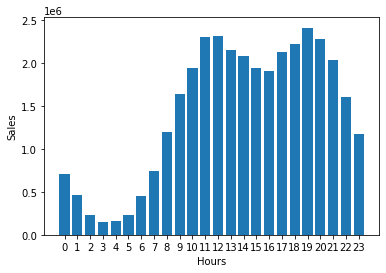

In [19]:
hours = df.groupby('hour').subtotal.sum()
plt.bar(range(24), hours)
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.xticks(range(24))
plt.show()

We can see that around 7pm is where sales start to peak.

### Question 4: what product sold the most? why?

In [27]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,subtotal,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9
8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,23
9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,11


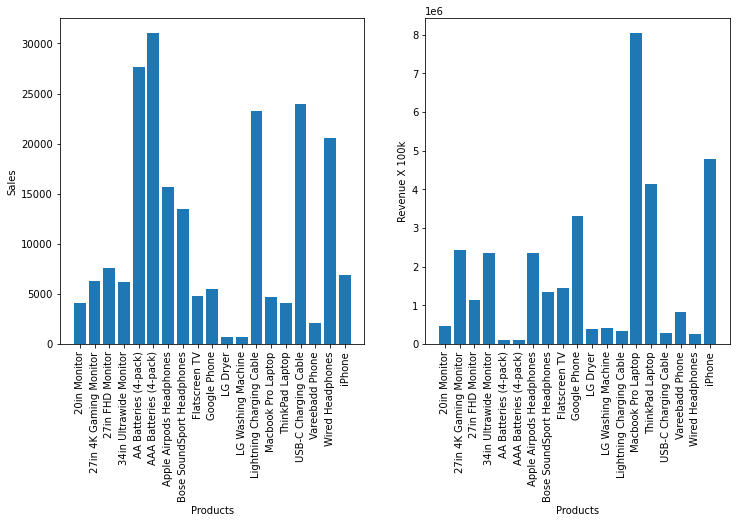

In [49]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
subtotal = product_group.sum()['subtotal']
products = [product for product, df in product_group]
# y = [ 0,100, 200, 300, 400, 500, 600, 700, 800]
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation = 'vertical')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.subplot(122)
plt.bar(products, subtotal)
plt.xlabel('Products')
plt.ylabel('Revenue X 100k')
plt.xticks(products, rotation = 'vertical')
plt.show()

From these graphs, we can conclude that Batteries, cables, chargers; are being sold the most. However, Macbook Pros are producing the most revenue, then the other electronics are following.